In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data = pd.read_excel("task3.xlsx")

In [5]:
data.head()

,Date,Day,Application price,Total app installs (marketing+organic from store),Impressions,Clicks,"CTR, %","Conversion, %",Marketing spend,Installs from Marketing campaigns,Cost per install,Margin
0,2015-10-01,Thu,2.99,257,508747,7742,1.52,1.06,317.54,82,3.87,450.89
1,2015-10-02,Fri,2.99,229,536338,9342,1.74,0.79,269.25,74,3.64,415.46
2,2015-10-03,Sat,2.99,311,456111,6277,1.38,2.29,428.70,144,2.98,501.19
3,2015-10-04,Sun,2.99,375,486295,7119,1.46,2.63,504.55,187,2.70,616.70
4,2015-10-05,Mon,2.99,395,546237,7750,1.42,2.95,620.38,229,2.71,560.67


### 1. At what price does application maximize its margin (Revenue-Marketing spend)?

In [4]:
data['Margin'] = data['Application price']*data['Total app installs (marketing+organic from store)']-data['Marketing spend']

In [6]:
data.groupby(['Application price'])['Margin'].mean()

Application price
1.99      533.551250
2.99      944.416667
9.99     3345.639143
14.99    9606.120606
Name: Margin, dtype: float64

#### Application maximize its margin at price 14.99

### 2. What factors have influence on total installs of the application? What factor influences app downloads more? Evaluate their influence and statistical significance using regression analysis.

In [7]:
cor_matrix = data.corr()

In [8]:
cor_matrix

,Application price,Total app installs (marketing+organic from store),Impressions,Clicks,"CTR, %","Conversion, %",Marketing spend,Installs from Marketing campaigns,Cost per install,Margin
Application price,1.000000,0.211325,0.645158,0.664840,0.465958,-0.644149,0.727565,0.360348,0.834463,0.785426
Total app installs (marketing+organic from store),0.211325,1.000000,0.594301,0.715394,0.569319,0.266708,0.764904,0.970498,-0.018953,0.666577
Impressions,0.645158,0.594301,1.000000,0.934473,0.360989,-0.435134,0.818027,0.694454,0.518762,0.785464
Clicks,0.664840,0.715394,0.934473,1.000000,0.605265,-0.369631,0.924374,0.814531,0.478093,0.897088
"CTR, %",0.465958,0.569319,0.360989,0.605265,1.000000,-0.089652,0.661965,0.626829,0.268651,0.637142
"Conversion, %",-0.644149,0.266708,-0.435134,-0.369631,-0.089652,1.000000,-0.250760,0.138675,-0.765997,-0.323840
Marketing spend,0.727565,0.764904,0.818027,0.924374,0.661965,-0.250760,1.000000,0.850549,0.524964,0.951028
Installs from Marketing campaigns,0.360348,0.970498,0.694454,0.814531,0.626829,0.138675,0.850549,1.000000,0.104071,0.746317
Cost per install,0.834463,-0.018953,0.518762,0.478093,0.268651,-0.765997,0.524964,0.104071,1.000000,0.519644
Margin,0.785426,0.666577,0.785464,0.897088,0.637142,-0.323840,0.951028,0.746317,0.519644,1.000000


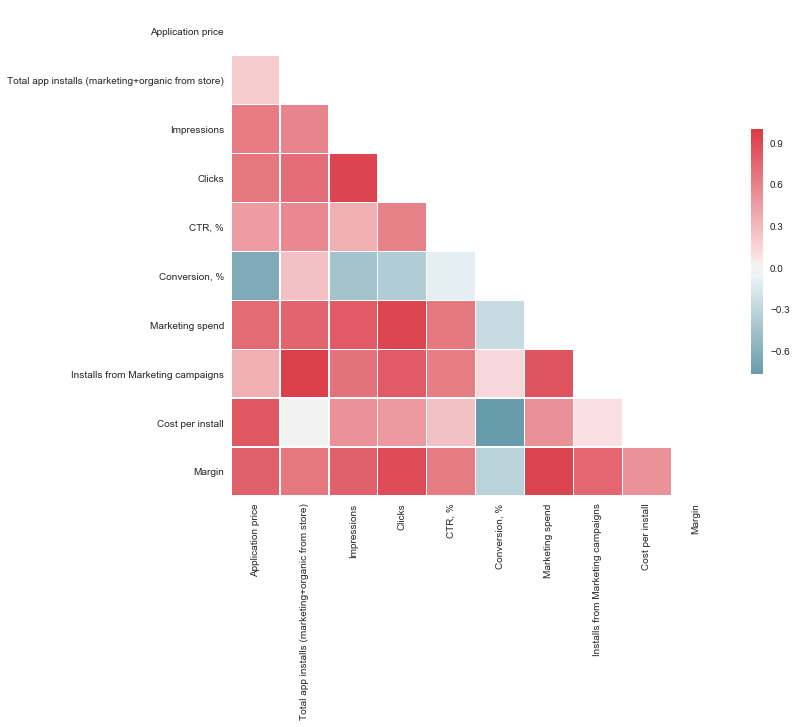

In [9]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In our dataset there are several factors that can influence on total installs of the application: 
1. Application price
2. Impressions
3. Clicks
4. CTR
5. Conversion
6. Marketing spend
7. Cost per install

In [10]:
installs = data['Total app installs (marketing+organic from store)'].values

In [11]:
factors = data[['Application price', 'Impressions', 'Clicks', 'CTR, %', 'Conversion, %', 'Marketing spend',
              'Cost per install']].as_matrix()
factors = sm.add_constant(factors, prepend=False)
model_ols = sm.OLS(installs, factors)
res = model_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 06 May 2018   Prob (F-statistic):          1.77e-118
Time:                        21:15:14   Log-Likelihood:                -1588.3
No. Observations:                 262   AIC:                             3193.
Df Residuals:                     254   BIC:                             3221.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -26.1693      3.653     -7.164      0.0

Impression and Clicks and Cost per instll has hight coefficient of correlation with Marketing spend. We remove it from model to avoid multicollinearity.

In [13]:
factors2 = data[['Application price', 'CTR, %', 'Conversion, %', 'Marketing spend']].as_matrix()

In [14]:
factors2 = sm.add_constant(factors2, prepend=False)
model_ols_2 = sm.OLS(installs, factors2)
res2 = model_ols_2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     431.2
Date:                Sun, 06 May 2018   Prob (F-statistic):          1.13e-112
Time:                        21:15:44   Log-Likelihood:                -1611.3
No. Observations:                 262   AIC:                             3233.
Df Residuals:                     257   BIC:                             3250.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -35.2122      3.236    -10.880      0.0

The finale model with all significant variables:
<br>
Installs = 131.23 + 33.13 \* Conversion + 0,28 \* Marketing spend + 52.38 \* CTR - 35.21 \* Application price

### 3. Try to forecast Total application installs at price 19.99. How will app margin change? Is it worth increasing the app price to this level?

In [15]:
data.groupby(['Application price'])['Conversion, %'].mean()

Application price
1.99     6.937500
2.99     6.441389
9.99     3.130286
14.99    3.665758
Name: Conversion, %, dtype: float64

In [16]:
data.groupby(['Application price'])['CTR, %'].mean()

Application price
1.99     2.171875
2.99     2.247870
9.99     2.473048
14.99    2.807576
Name: CTR, %, dtype: float64

Use our model for dredicting installs with price = 19.99. We will use conversion and CTR as it was with price 14.99 - 3.66 and 2.8
<br>
Installs = 131.23 + 33.13 \* 3.66 + 0,28 \* Marketing spend + 52.38 \* 2.8 - 35.21 \* 19.99
<br>
Installs = 0.28 \* Marketing spend - 304.6981

In [17]:
data.groupby(['Application price'])['Marketing spend'].mean()

Application price
1.99      429.857500
2.99      698.228426
9.99     1570.392286
14.99    3818.560000
Name: Marketing spend, dtype: float64

If we don't change marketing spend we get 764 installs by day
<br>
0.28\*3818.56 -304.6981 = 764.5

Revenue with new price
<br>
764 * 19.99 = 15272.36 
<br>
Margin with new price
<br>
15272.36 - 3818.56 = 11453.8 
<br>
##### The margin increase after increasing price to 19.99

In [18]:
#linear regression using sklearn
from sklearn.linear_model import LinearRegression
factors5 = data[['Application price', 'CTR, %', 'Conversion, %', 'Marketing spend']].as_matrix()
lr = LinearRegression()
lr.fit(factors5, installs)
X = np.array([19.99, 2.8, 3.66, 3818.56]).reshape(1, -1)

print(lr.predict(X))

[781.36597514]
